In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
df=pd.read_csv("/content/TimeSeries.csv",parse_dates=["Date"],index_col="Date")
df

,Value
Date,
1991-01-07,3.526591
1991-01-08,3.180891
1991-01-09,3.252221
1991-01-10,3.611003
1991-01-11,3.565869
...,...
2008-01-02,21.654285
2008-01-03,18.264945
2008-01-04,23.107677


<Axes: xlabel='Date'>

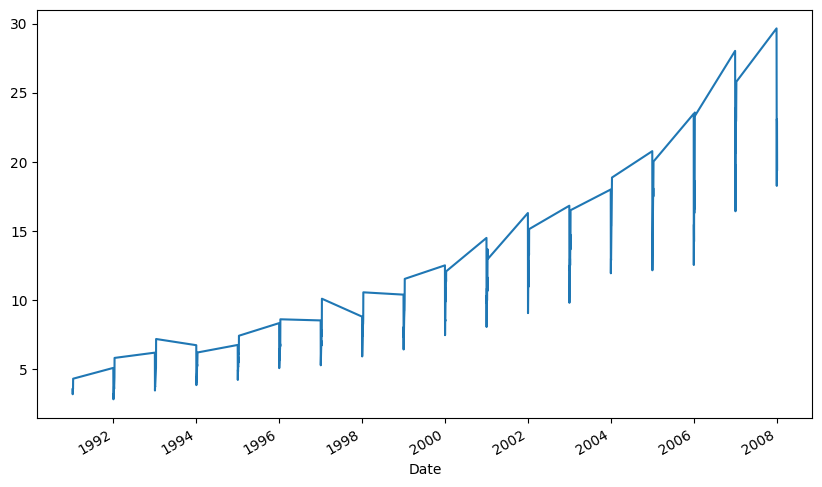

In [ ]:
plt.rcParams.update({"figure.figsize":(10,6)})
df["Value"].plot()


<Axes: xlabel='Date'>

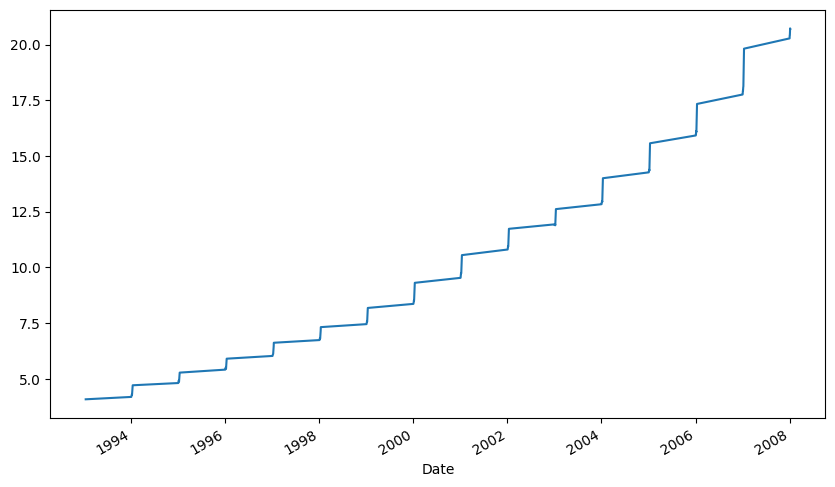

In [ ]:
df["Value"]=df["Value"].rolling(window=30).mean()
df["Value"].dropna().plot()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    204 non-null    object 
 1   Value   146 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


In [ ]:
import numpy as np
import statsmodels.api as sm
order=(1,0,1)
model=sm.tsa.ARIMA(df,order=order)
results=model.fit()
y_pred=results.predict(len(df),len(df)+2)
print(y_pred)
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


204    20.681292
205    20.679309
206    20.677327
Name: predicted_mean, dtype: float64
                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  204
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 134.707
Date:                Wed, 01 Nov 2023   AIC                           -261.414
Time:                        07:51:32   BIC                           -248.141
Sample:                             0   HQIC                          -256.045
                                - 204                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3030      8.177      1.505      0.132      -3.723      28.329
ar.L1          0.9998      0.004    248.444

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
order=(1,1,1)
model=sm.tsa.ARIMA(df,order=order)
results=model.fit()
y_pred=results.predict(len(df),len(df)+2)
print(y_pred)
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


204    20.726205
205    20.745964
206    20.763290
Name: predicted_mean, dtype: float64
                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  204
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 164.796
Date:                Wed, 01 Nov 2023   AIC                           -323.592
Time:                        07:54:09   BIC                           -313.652
Sample:                             0   HQIC                          -319.570
                                - 204                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8769      0.040     22.087      0.000       0.799       0.955
ma.L1         -0.3181      0.106     -2.999

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
data=[10,12,14,16,18,20]

In [ ]:
#ar
ARmodel=AutoReg(data, lags=1)
ARmodel_fit=ARmodel.fit()
y_pred=ARmodel_fit.predict(6,10)
print(y_pred)

[22. 24. 26. 28. 30.]


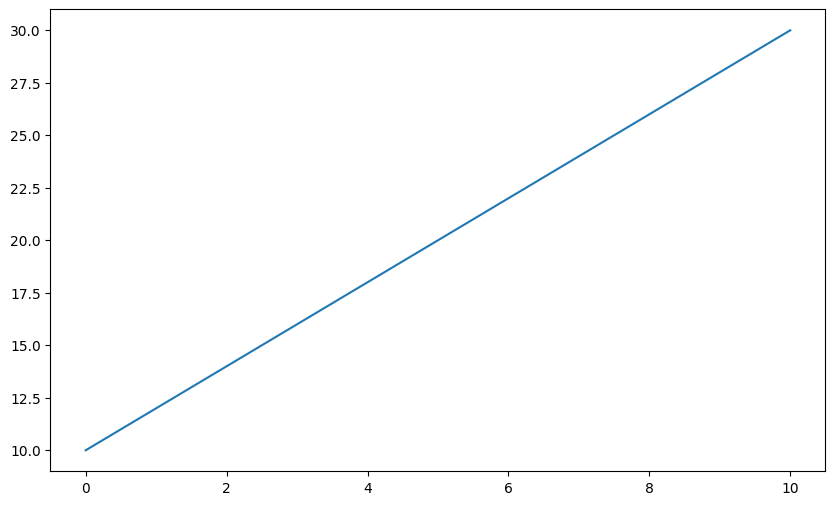

In [ ]:
pred_list=y_pred.tolist()
combinedlist=data+pred_list
plt.plot(combinedlist)

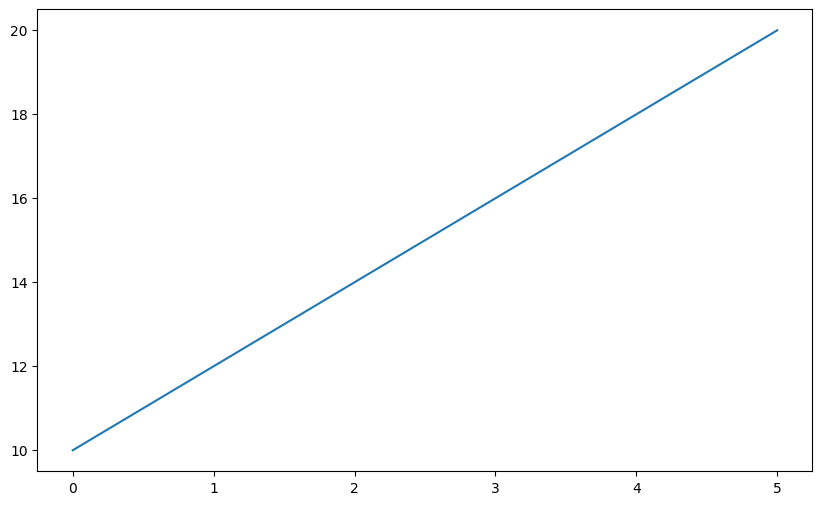

In [ ]:
from statsmodels.tsa.arima_model import ARMA
plt.plot(data)

In [ ]:
import numpy as np
import statsmodels.api as sm


In [ ]:
#ma
order=(0,0,1)
model=sm.tsa.ARIMA(data,order=order)
results=model.fit()
y_pred=results.predict(8,10)
print(y_pred)
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


[14.99996746 14.99996746 14.99996746]
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    6
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -14.108
Date:                Wed, 01 Nov 2023   AIC                             34.216
Time:                        07:33:01   BIC                             33.591
Sample:                             0   HQIC                            31.715
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0000      1.616      9.282      0.000      11.833      18.167
ma.L1          0.9998   2111.011      0.000      1.000   -4136.506    4138.506
sigma2        

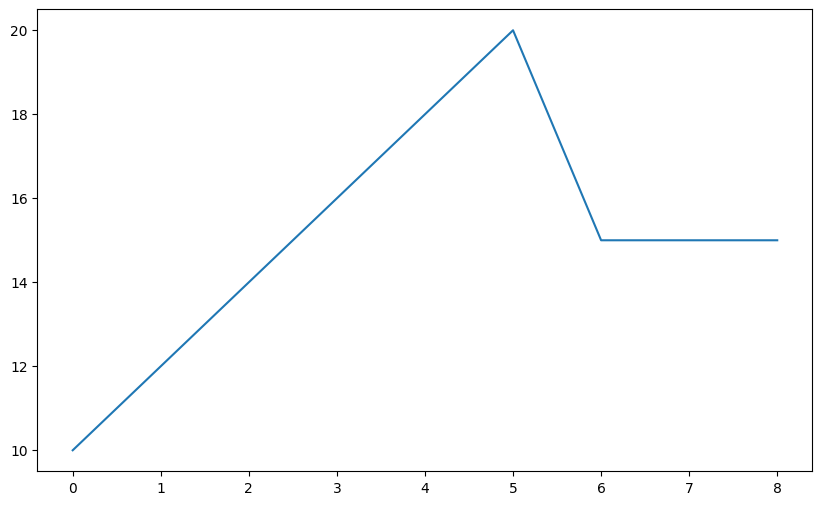

In [ ]:
pred_list=y_pred.tolist()
combined_list=data+pred_list
plt.plot(combined_list)